No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/t1/0d67g5dx15v4hv9sk_g2cx1c0000gp/T/ipykernel

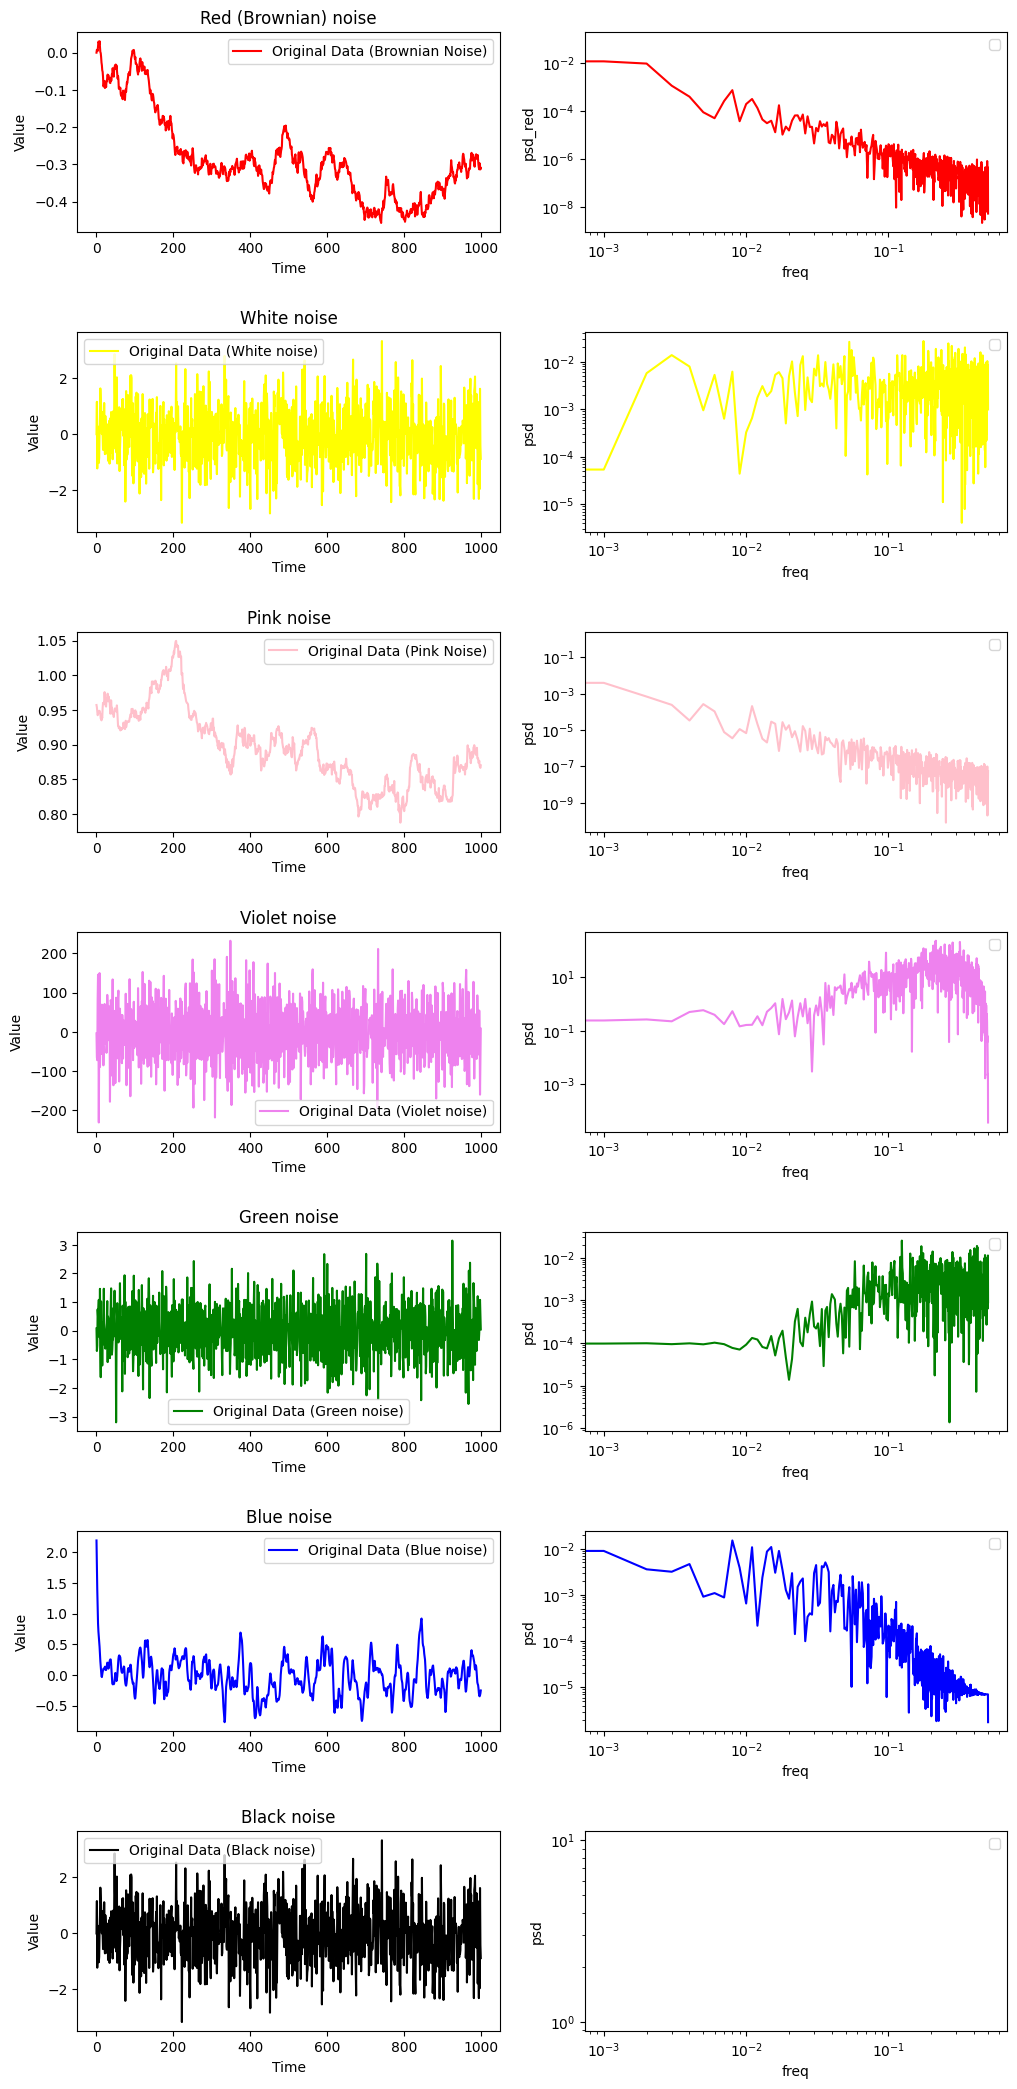

In [2]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

def power_spectrum(time, signal):
    N = len(time)
    dt = time[1] - time[0]
    is_even = not N % 2
    N_f = int(np.ceil(N/2)) + int(is_even)
    frequencies = np.arange(N_f) / (dt * (N-1))

    fft = np.fft.fft(signal)
    fft_cut = np.copy(fft[:N_f])
    if is_even:
        fft_cut[1:-1] = 2 * fft_cut[1:-1]
    else:
        fft_cut[1:] = 2 * fft_cut[1:]
    power_spectrum = (1/N**2) * np.power(np.absolute(fft_cut), 2)
    return frequencies, power_spectrum

def generate_data(N, dt, model_order):

  t = np.linspace(0, (N-1) * dt, N)
  x = np.zeros(t.shape)

  # Brownian motion (integrate white noise)
  w = np.random.randn(N)  # White noise
  for i in range(1, N):
    x[i] = x[i-1] + dt * w[i]

  return t, x
def generate_data_white(N, dt, model_order):
    t = np.linspace(0, (N-1) * dt, N)
    x1 = np.zeros(t.shape)

  # Brownian motion (integrate white noise)
    w = np.random.randn(N)  # White noise
    for i in range(1, N):
        x1[i] =  w[i]
    return t, x1

def generate_data_pink(N, dt, model_order, alpha=1):

    if not 0 <= alpha <= 2:
        raise ValueError("alpha must be between 0 and 2 for pink noise.")

    t = np.linspace(0, (N - 1) * dt, N)
    x2 = np.zeros(t.shape)
    w = np.random.randn(N)  # White noise

  # Initial value sets the trend for pink noise
    x2[0] = w[0]

    for i in range(1, N):
    # Simulate a power-law distributed factor based on alpha
        factor = np.random.rand()**(1 / alpha)
        x2[i] = x2[i - 1] + factor * w[i] * dt

    return t, x2

def generate_data_violet(N, dt, model_order):
    t = np.linspace(0, (N - 1) * dt, N)
    w = np.random.randn(N)  # White noise

  # Perform numerical differentiation to approximate violet noise
    x3 = np.gradient(w) / dt  # Divide by dt to scale for violet noise

  # Optional: Adjust the scaling factor for the desired intensity
  # x *= scaling_factor

    return t, x3



def autoregression(data, model_order):
    N = len(data)
    X = np.zeros((N - model_order, model_order))
    y = data[model_order:]
    for i in range(N - model_order):
        X[i, :] = data[i:i + model_order]

    coefficients = np.linalg.lstsq(X, y, rcond=None)[0]
    predicted_values = np.zeros(N)
    for i in range(model_order, N):
        predicted_values[i] = np.dot(coefficients, data[i - model_order:i])

    return coefficients, predicted_values




def butter_filter(data, b, a):
    return filtfilt(b, a, data)

def generate_data_green(N, dt, cutoff_freq):
    # Generate white noise
    t = np.linspace(0, (N - 1) * dt, N)
    k = np.random.randn(N)  # White noise

  # Design a high-pass filter (remove low frequencies)
    nyquist_freq = 0.5 / dt  # Nyquist frequency
    normalized_cutoff_freq = cutoff_freq / nyquist_freq
    from scipy.signal import butter  # Assuming scipy is installed
    b, a = butter(1, normalized_cutoff_freq, btype='high')

  # Filter the white noise to obtain green noise approximation
    x4 = butter_filter(k, b, a)
    
    return t, x4


def generate_data_blue(N, dt, cutoff_freq):

  # Generate white noise
    t = np.linspace(0, (N - 1) * dt, N)
    w = np.random.randn(N)  # White noise

  # Design a low-pass filter (remove high frequencies)
    nyquist_freq = 0.5 / dt  # Nyquist frequency
    normalized_cutoff_freq = cutoff_freq / nyquist_freq
    b, a = butter(1, normalized_cutoff_freq, btype='low')

  # Filter the white noise to obtain blue noise approximation
    x5 = filtfilt(b, a, w)

    return t, x5

def generate_data_black(N):
    t = np.linspace(0, (N - 1), N)
    x6 = np.zeros(N)

    return t, x6


# Define simulation parameters
N = 1000
dt = 0.01
model_order = 5

# Generate data (Brownian motion)
t, x = generate_data(N, dt, model_order)
t, x1 = generate_data_white(N, dt, model_order)
t, x2 = generate_data_pink(N, dt, model_order,  alpha=1)
t, x3 = generate_data_violet(N, dt, model_order)
t, x4 = generate_data_green(N, dt, model_order)
t, x5 = generate_data_blue(N, dt, model_order)
t, x6 = generate_data_black(N)

freq, psd_x = power_spectrum(t,x)
freq_white, psd_white = power_spectrum(t,x1)
freq_pink, psd_pink = power_spectrum(t,x2)
freq_violet, psd_violet = power_spectrum(t,x3)
freq_green, psd_green = power_spectrum(t,x4)
freq_blue, psd_blue = power_spectrum(t,x5)
freq_black, psd_black = power_spectrum(t,x6)


# Build and fit AR model
coefficients, predicted_values = autoregression(x, model_order)
coefficients_white, predicted_values_white = autoregression(x1, model_order)
coefficients_pink, predicted_values_pink = autoregression(x2, model_order)
coefficients_violet, predicted_values_violet = autoregression(x3, model_order)
coefficients_green, predicted_values_green = autoregression(x4, model_order)
coefficients_blue, predicted_values_blue = autoregression(x5, model_order)
coefficients_black,predicted_values_black = autoregression(x6, model_order)

# Add noise back to predictions (optional)
noisy_predictions = predicted_values + np.random.randn(N) * 0.1  # Adjust noise level with scale factor
noisy_predictions_white = predicted_values_white + np.random.randn(N) * 0.1
noisy_predictions_pink = predicted_values_pink + np.random.randn(N) * 0.1
noisy_predictions_violet = predicted_values_violet + np.random.randn(N) * 0.1
noisy_predictions_green = predicted_values_green + np.random.randn(N) * 0.1
noisy_predictions_blue = predicted_values_blue + np.random.randn(N) * 0.1
noisy_predictions_black = predicted_values_black + np.random.randn(N) * 0.1

# Plot results
plt.figure(figsize=(12,10))
plt.subplots_adjust(bottom=0.001, top=2, hspace=0.5)
plt.subplot(7,2,1)
plt.title ('Red (Brownian) noise')
plt.plot(t, x, label="Original Data (Brownian Noise)", color="red")
#plt.plot(t, noisy_predictions, label="AR Predicted with Noise")
#plt.plot(t, predicted_values, label="AR Predicted (Clean)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(fontsize=10)
plt.subplot(7,2,2); plt.plot(freq, psd_x, color="red")
plt.xscale('log'); plt.yscale('log')
plt.xlabel("freq")
plt.ylabel("psd_red")
plt.legend(fontsize=10)


plt.subplot(7,2,3)
plt.title('White noise')
plt.plot(t, x1, label="Original Data (White noise)", color='yellow')
#plt.plot(t, noisy_predictions_white, label="AR Predicted with Noise")
#plt.plot(t, predicted_values_white, label="AR Predicted (Clean)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(fontsize=10)
plt.subplot(7,2,4); plt.plot(freq_white, psd_white, color='yellow')
plt.xscale('log'); plt.yscale('log')
plt.xlabel("freq")
plt.ylabel("psd")
plt.legend(fontsize=10)



plt.subplot(7,2,5)
plt.title('Pink noise')
plt.plot(t, x2, label="Original Data (Pink Noise)", color='pink')
#plt.plot(t, noisy_predictions_pink, label="AR Predicted with Noise")
#plt.plot(t, predicted_values_pink, label="AR Predicted (Clean)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(fontsize=10)
plt.subplot(7,2,6); plt.plot(freq_pink, psd_pink, color='pink')
plt.xscale('log'); plt.yscale('log')
plt.xlabel("freq")
plt.ylabel("psd")
plt.legend(fontsize=10)


plt.subplot(7,2,7)
plt.title('Violet noise')
plt.plot(t, x3, label="Original Data (Violet noise)", color='violet')
#plt.plot(t, noisy_predictions_white, label="AR Predicted with Noise")
#plt.plot(t, predicted_values_white, label="AR Predicted (Clean)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(fontsize=10)
plt.subplot(7,2,8); plt.plot(freq_violet, psd_violet, color='violet')
plt.xscale('log'); plt.yscale('log')
plt.xlabel("freq")
plt.ylabel("psd")
plt.legend(fontsize=10)


plt.subplot(7,2,9)
plt.title('Green noise')
plt.plot(t, x4, label="Original Data (Green noise)", color='green')
#plt.plot(t, noisy_predictions_white, label="AR Predicted with Noise")
#plt.plot(t, predicted_values_white, label="AR Predicted (Clean)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(fontsize=10)
plt.subplot(7,2,10); plt.plot(freq_green, psd_green, color='green')
plt.xscale('log'); plt.yscale('log')
plt.xlabel("freq")
plt.ylabel("psd")
plt.legend(fontsize=10)


plt.subplot(7,2,11)
plt.title('Blue noise')
plt.plot(t, x5, label="Original Data (Blue noise)", color='blue')
#plt.plot(t, noisy_predictions_white, label="AR Predicted with Noise")
#plt.plot(t, predicted_values_white, label="AR Predicted (Clean)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(fontsize=10)
plt.subplot(7,2,12); plt.plot(freq_blue, psd_blue, color='blue')
plt.xscale('log'); plt.yscale('log')
plt.xlabel("freq")
plt.ylabel("psd")
plt.legend(fontsize=10)


plt.subplot(7,2,13)
plt.title('Black noise')
plt.plot(t, x1, label="Original Data (Black noise)", color='black')
#plt.plot(t, noisy_predictions_white, label="AR Predicted with Noise")
#plt.plot(t, predicted_values_white, label="AR Predicted (Clean)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(fontsize=10)
plt.subplot(7,2,14); plt.plot(freq_black, psd_black, color='black')
plt.xscale('log'); plt.yscale('log')
plt.xlabel("freq")
plt.ylabel("psd")
plt.legend(fontsize=10)

plt.show()

/var/folders/t1/0d67g5dx15v4hv9sk_g2cx1c0000gp/T/ipykernel_32986/2969094210.py:49: RuntimeWarning: divide by zero encountered in log
  log_psd_black = np.log(psd_black[1:])  # Omitting the first power spectrum density point corresponding to zero frequency


/Users/user/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


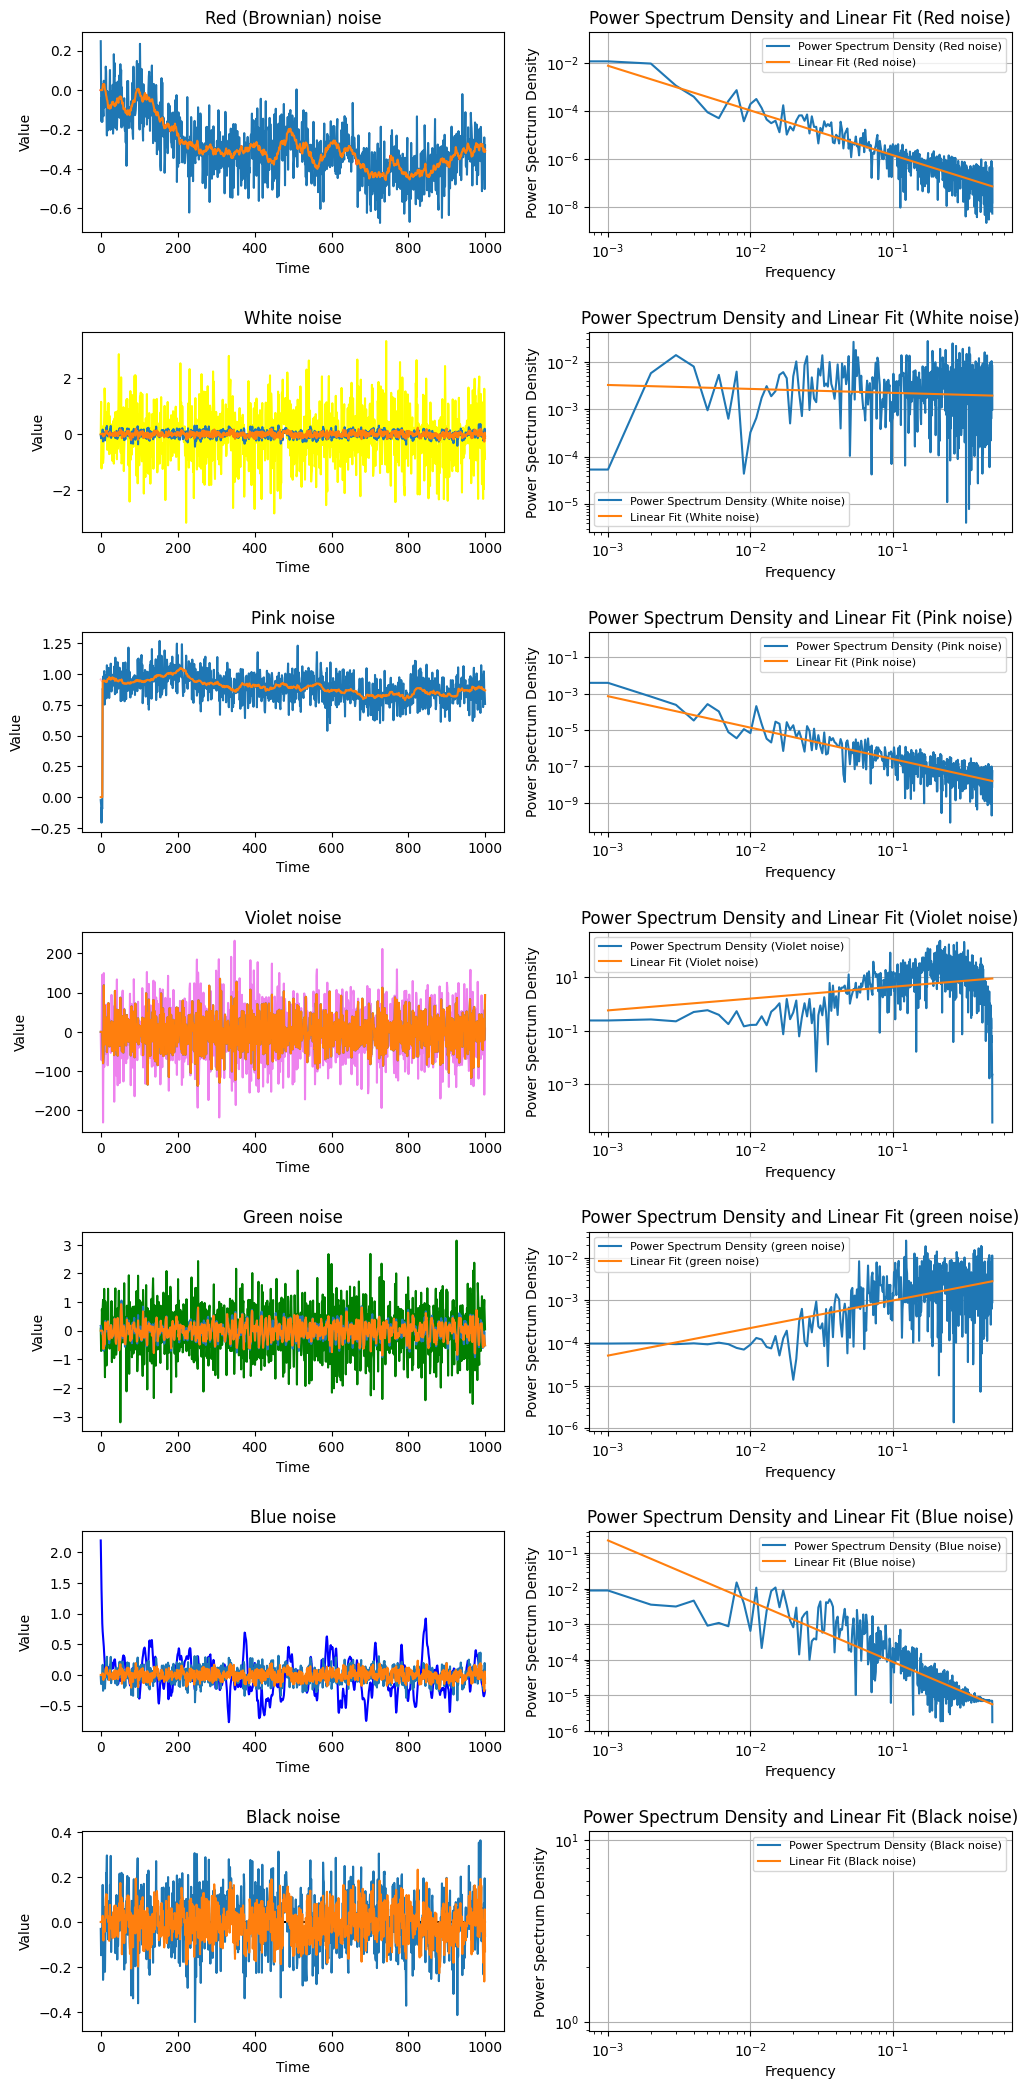

In [3]:
log_freq_red = np.log(freq[1:])
log_psd_x = np.log(psd_x[1:])  # Omitting the first power spectrum density point corresponding to zero frequency
# Perform linear fit
fit_coeffs_red = np.polyfit(log_freq_red, log_psd_x, 1)
fit_line_red = np.polyval(fit_coeffs_red, log_freq_red)


log_freq_white = np.log(freq_white[1:])
log_psd_white = np.log(psd_white[1:])  # Omitting the first power spectrum density point corresponding to zero frequency
# Perform linear fit
fit_coeffs_white = np.polyfit(log_freq_white, log_psd_white, 1)
fit_line_white = np.polyval(fit_coeffs_white, log_freq_white)


log_freq_pink = np.log(freq_pink[1:])
log_psd_pink = np.log(psd_pink[1:])  # Omitting the first power spectrum density point corresponding to zero frequency
# Perform linear fit
fit_coeffs_pink = np.polyfit(log_freq_pink, log_psd_pink, 1)
fit_line_pink = np.polyval(fit_coeffs_pink, log_freq_pink)



log_freq_violet = np.log(freq_violet[1:])
log_psd_violet = np.log(psd_violet[1:])  # Omitting the first power spectrum density point corresponding to zero frequency
# Perform linear fit
fit_coeffs_violet = np.polyfit(log_freq_violet, log_psd_violet, 1)
fit_line_violet = np.polyval(fit_coeffs_violet, log_freq_violet)


log_freq_green = np.log(freq_green[1:])
log_psd_green = np.log(psd_green[1:])  # Omitting the first power spectrum density point corresponding to zero frequency
# Perform linear fit
fit_coeffs_green = np.polyfit(log_freq_green, log_psd_green, 1)
fit_line_green = np.polyval(fit_coeffs_green, log_freq_green)




log_freq_blue = np.log(freq_blue[1:])
log_psd_blue = np.log(psd_blue[1:])  # Omitting the first power spectrum density point corresponding to zero frequency
# Perform linear fit
fit_coeffs_blue = np.polyfit(log_freq_blue, log_psd_blue, 1)
fit_line_blue = np.polyval(fit_coeffs_blue, log_freq_blue)




log_freq_black = np.log(freq_black[1:])
log_psd_black = np.log(psd_black[1:])  # Omitting the first power spectrum density point corresponding to zero frequency
# Perform linear fit
fit_coeffs_black = np.polyfit(log_freq_black, log_psd_black, 1)
fit_line_black = np.polyval(fit_coeffs_black, log_freq_black)







plt.figure(figsize=(12,10))
plt.subplot(7,2,1)
plt.subplots_adjust(bottom=0.001, top=2, hspace=0.5)

plt.title('Red (Brownian) noise')
plt.plot(t, x, label="Original Data (Red noise)", color='red')
plt.plot(t, noisy_predictions, label="AR Predicted with Noise")
plt.plot(t, predicted_values, label="AR Predicted (Clean)")
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(7,2,2)
plt.loglog(freq, psd_x, label="Power Spectrum Density (Red noise)")
plt.loglog(np.exp(log_freq_red), np.exp(fit_line_red), label="Linear Fit (Red noise)")
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum Density")
plt.title("Power Spectrum Density and Linear Fit (Red noise)")
plt.legend()
plt.grid(True)
#plt.legend(fontsize=10)
#plt.subplot(2,1,2); plt.plot(freq_white, psd_white, color='yellow')
#plt.xscale('log'); plt.yscale('log')
#plt.xlabel("freq")
#plt.ylabel("psd")
plt.legend(fontsize=8)

plt.subplot(7,2,3)
plt.title('White noise')
plt.plot(t, x1, label="Original Data (White noise)", color='yellow')
plt.plot(t, noisy_predictions_white, label="AR Predicted with Noise")
plt.plot(t, predicted_values_white, label="AR Predicted (Clean)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.subplot(7,2,4)
plt.loglog(freq_white, psd_white, label="Power Spectrum Density (White noise)")
plt.loglog(np.exp(log_freq_white), np.exp(fit_line_white), label="Linear Fit (White noise)")
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum Density")
plt.title("Power Spectrum Density and Linear Fit (White noise)")
plt.legend()
plt.grid(True)
#plt.legend(fontsize=10)
#plt.subplot(2,1,2); plt.plot(freq_white, psd_white, color='yellow')
#plt.xscale('log'); plt.yscale('log')
#plt.xlabel("freq")
#plt.ylabel("psd")
plt.legend(fontsize=8)

plt.subplot(7,2,5)
plt.title('Pink noise')
plt.plot(t, x2, label="Original Data (Pink noise)", color='pink')
plt.plot(t, noisy_predictions_pink, label="AR Predicted with Noise")
plt.plot(t, predicted_values_pink, label="AR Predicted (Clean)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.subplot(7,2,6)
plt.loglog(freq_pink, psd_pink, label="Power Spectrum Density (Pink noise)")
plt.loglog(np.exp(log_freq_pink), np.exp(fit_line_pink), label="Linear Fit (Pink noise)")
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum Density")
plt.title("Power Spectrum Density and Linear Fit (Pink noise)")
plt.legend()
plt.grid(True)
#plt.legend(fontsize=10)
#plt.subplot(2,1,2); plt.plot(freq_white, psd_white, color='yellow')
#plt.xscale('log'); plt.yscale('log')
#plt.xlabel("freq")
#plt.ylabel("psd")
plt.legend(fontsize=8)

plt.subplot(7,2,7)
plt.title('Violet noise')
plt.plot(t, x3, label="Original Data (Violete noise)", color='violet')
plt.plot(t, noisy_predictions_violet, label="AR Predicted with Noise")
plt.plot(t, predicted_values_violet, label="AR Predicted (Clean)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.subplot(7,2,8)
plt.loglog(freq_violet, psd_violet, label="Power Spectrum Density (Violet noise)")
plt.loglog(np.exp(log_freq_violet), np.exp(fit_line_violet), label="Linear Fit (Violet noise)")
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum Density")
plt.title("Power Spectrum Density and Linear Fit (Violet noise)")
plt.legend()
plt.grid(True)
#plt.legend(fontsize=10)
#plt.subplot(2,1,2); plt.plot(freq_white, psd_white, color='yellow')
#plt.xscale('log'); plt.yscale('log')
#plt.xlabel("freq")
#plt.ylabel("psd")
plt.legend(fontsize=8)

plt.subplot(7,2,9)
plt.title('Green noise')
plt.plot(t, x4, label="Original Data (Green noise)", color='green')
plt.plot(t, noisy_predictions_green, label="AR Predicted with Noise")
plt.plot(t, predicted_values_green, label="AR Predicted (Clean)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.subplot(7,2,10)
plt.loglog(freq_green, psd_green, label="Power Spectrum Density (green noise)")
plt.loglog(np.exp(log_freq_green), np.exp(fit_line_green), label="Linear Fit (green noise)")
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum Density")
plt.title("Power Spectrum Density and Linear Fit (green noise)")
plt.legend()
plt.grid(True)
#plt.legend(fontsize=10)
#plt.subplot(2,1,2); plt.plot(freq_white, psd_white, color='yellow')
#plt.xscale('log'); plt.yscale('log')
#plt.xlabel("freq")
#plt.ylabel("psd")
plt.legend(fontsize=8)

plt.subplot(7,2,11)
plt.title('Blue noise')
plt.plot(t, x5, label="Original Data (Blue noise)", color='blue')
plt.plot(t, noisy_predictions_white, label="AR Predicted with Noise")
plt.plot(t, predicted_values_white, label="AR Predicted (Clean)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.subplot(7,2,12)
plt.loglog(freq_blue, psd_blue, label="Power Spectrum Density (Blue noise)")
plt.loglog(np.exp(log_freq_blue), np.exp(fit_line_blue), label="Linear Fit (Blue noise)")
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum Density")
plt.title("Power Spectrum Density and Linear Fit (Blue noise)")
plt.legend()
plt.grid(True)
#plt.legend(fontsize=10)
#plt.subplot(2,1,2); plt.plot(freq_white, psd_white, color='yellow')
#plt.xscale('log'); plt.yscale('log')
#plt.xlabel("freq")
#plt.ylabel("psd")
plt.legend(fontsize=8)

plt.subplot(7,2,13)
plt.title('Black noise')
plt.plot(t, x6, label="Original Data (Black noise)", color='black')
plt.plot(t, noisy_predictions_white, label="AR Predicted with Noise")
plt.plot(t, predicted_values_white, label="AR Predicted (Clean)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.subplot(7,2,14)
plt.loglog(freq_black, psd_black, label="Power Spectrum Density (Black noise)")
plt.loglog(np.exp(log_freq_black), np.exp(fit_line_black), label="Linear Fit (Black noise)")
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum Density")
plt.title("Power Spectrum Density and Linear Fit (Black noise)")
plt.legend()
plt.grid(True)
#plt.legend(fontsize=10)
#plt.subplot(2,1,2); plt.plot(freq_white, psd_white, color='yellow')
#plt.xscale('log'); plt.yscale('log')
#plt.xlabel("freq")
#plt.ylabel("psd")
plt.legend(fontsize=8)

In [4]:
#Double potential well with white noise

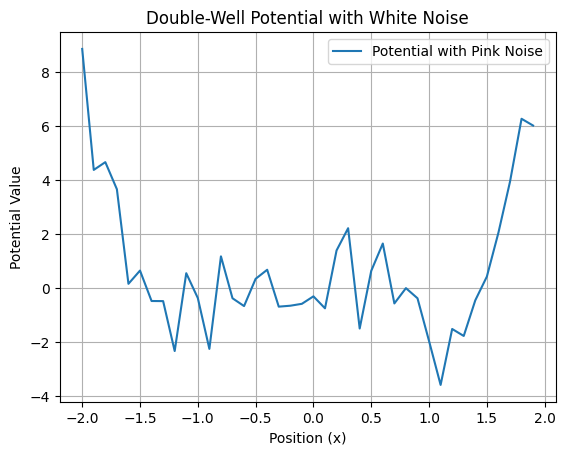

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def generate_data_white(N, dt, model_order):
    t = np.linspace(0, (N-1) * dt, N)
    x1 = np.zeros(t.shape)

    # Brownian motion (integrate white noise)
    w = np.random.randn(N)  # White noise
    for i in range(1, N):
        x1[i] = x1[i-1] + w[i] * dt  # Integrate white noise

    return t, x1

def double_well_potential(x, noise):
    potential = x**4 - 2*x**2  # Double-well potential function
    # Add white noise to the potential (ensure it's white noise)
    potential_with_noise = potential + noise
    return potential_with_noise

N = 1000  # Number of data points
dt = 0.01  # Time step
model_order = 4  # Model order for generating data

t_pink, x_pink = generate_data_pink(N, dt, model_order)

# Sample white noise for the potential function at each position
position = np.arange(-2, 2, 0.1)  # Define positions in the system
num_positions = len(position)

# Ensure position and noise have compatible data types (if needed)
position = position.astype(float)  # Convert position to float (if necessary)

# Generate white noise with the same shape as position (ensure it's white noise)
pink_noise = np.random.randn(num_positions)

potential_with_noise = double_well_potential(position, pink_noise)

# Plot the potential with noise vs position
plt.plot(position, potential_with_noise, label="Potential with Pink Noise")
plt.xlabel("Position (x)")
plt.ylabel("Potential Value")
plt.title("Double-Well Potential with White Noise")
plt.legend()
plt.grid(True)
plt.show()

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import lfilter  # for colored noise generation

def generate_data_pink(N, dt, alpha=1):
  """Generates pink noise data.

  Args:
      N: Number of data points.
      dt: Time step.
      alpha: Controls "pinkness" of noise (0 <= alpha <= 2).

  Returns:
      t: Array of timestamps.
      x: Array of pink noise data.
  """
  if not 0 <= alpha <= 2:
    raise ValueError("alpha must be between 0 and 2 for pink noise.")

  t = np.linspace(0, (N-1) * dt, N)
  x = np.zeros(t.shape)
  w = np.random.randn(N)  # White noise

  # Initial value sets the trend for pink noise
  x[0] = w[0]

  for i in range(1, N):
    # Simulate a power-law distributed factor based on alpha
    factor = np.random.rand()**(1 / alpha)
    x[i] = x[i - 1] + factor * w[i] * dt

  return t, x

def generate_colored_noise(N, dt, alpha, noise_type="pink"):
  """Generates colored noise data (white, pink, or brown).

  Args:
      N: Number of data points.
      dt: Time step.
      noise_type: Type of colored noise ("white", "pink", or "brown").
      alpha: Controls "pinkness" for pink noise (0 <= alpha <= 2).

  Returns:
      t: Array of timestamps.
      noise: Array of colored noise data.
  """

  if noise_type == "white":
    noise = np.random.randn(N)
  elif noise_type == "pink":
    print(1)
    t, noise = generate_data_pink(N, dt, alpha)
  elif noise_type == "brown":
    # Implement a 1st-order low-pass filter for brown noise (replace with a better filter if needed)
    b = [1]  # numerator coefficients (all 1 for identity)
    a = [1, 0.99]  # denominator coefficients (controls low-pass filtering)
    noise = lfilter(b, a, np.random.randn(N))
  else:
    raise ValueError("Invalid noise type. Choose 'white', 'pink', or 'brown'.")

  return t, noise

def double_well_potential(x, a, b):
  """Calculates double-well potential value.

  Args:
      x: Position in the system.
      a: Controls well depth (larger a, deeper wells).
      b: Controls barrier shape (larger b, wider barrier).

  Returns:
      Potential value.
  """
  return a * x**4 - b * x**2  # This is the correct double-well potential function




def simulate_system(N, dt, alpha, noise_type="pink", track_state=False):
  """Simulates the system with potential well and noise.

  Args:
      N: Number of data points.
      dt: Time step.
      a: Controls well depth.
      b: Controls barrier shape.
      noise_type: Type of colored noise.
      alpha: Controls "pinkness" for pink noise.
      track_state: Whether to track system state (in which minimum).

  Returns:
      t: Array of timestamps.
      x: Array of system state (position).
      transition_count: Number of transitions between minima (if track_state is True).
  """
  t, noise = generate_colored_noise(N, dt, noise_type, alpha)
  x = np.zeros(t.shape)
  current_state = 0  # Start in minimum 0 (assuming left minimum)
  transition_count = 0

  for i in range(1, N):
    potential = double_well_potential(x[i-1], a, b) + noise[i]
    # Update position based on potential gradient (simple overdamped motion)
    x[i] = x[i-1] - 0.1 * potential  # Adjust damping coefficient as needed

    # Track state transitions (if enabled)
    if track_state:
      if x[i-1] * x[i] < 0:  # Check if position crossed a threshold (indicating transition)
        current_state = 1 - current_state  # Update state
        transition_count += 1

  # Calculate transition probability (if tracking state)
  transition_probability = transition_count / (N - 1) if track_state else None

  return t, x, transition_probability

In [61]:
noise_type="pink"
for i, noise_type in enumerate(noise_type):
    print(i,noise_type)
    t,x=generate_data_pink(N, dt, alpha)
    p, noise= generate_colored_noise(N, dt, noise_type, alpha)

0 p


ValueError: Invalid noise type. Choose 'white', 'pink', or 'brown'.

In [65]:
import matplotlib.pyplot as plt

# Simulation parameters
N = 1000  # Number of data points
dt = 0.01  # Time step
a = 1  # Controls well depth
b = 1  # Controls barrier shape
noise_type = "pink"  # List of noise types to simulate
alpha = 1  # Pink noise parameter (controls "pinkness")
track_state = True  # Whether to track state transitions

# Initialize empty lists for storing results
transition_probs = []
results = []  # List to store simulation results (t, x) for each noise type
plt.figure(figsize=(12, 8))  # Set larger figure for multiple subplots
alpha_array=[0.1, 0.2, 0.3, 0.5, 1]
for i, alpha_array in enumerate(alpha_array):
    #print(i, alpha_array)
  # Simulate the system for each noise type
    t, x, transition_probability = simulate_system(N, dt, a, b, noise_type, alpha_array[i], track_state)
    #print(t)
  #transition_probs.append(transition_probability)
    results.append((t, x))  # Store results in a list
    print("transition probability is ", transition_probability)



TypeError: 'float' object is not subscriptable

<Figure size 1200x800 with 0 Axes>